In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [2]:
image_size = (400, 400)

kernel_size = 5
sobel_x = cv.getDerivKernels(0, 1, kernel_size)
sobel_x = sobel_x[0] @ sobel_x[1].T
sobel_y = cv.getDerivKernels(1, 0, kernel_size)
sobel_y = sobel_y[0] @ sobel_y[1].T

sobel_x_fft = np.fft.fftshift(np.fft.fft2(sobel_x, image_size))
sobel_y_fft = np.fft.fftshift(np.fft.fft2(sobel_y, image_size))

convoluted = sobel_x_fft * sobel_y_fft

(-0.5, 399.5, 399.5, -0.5)

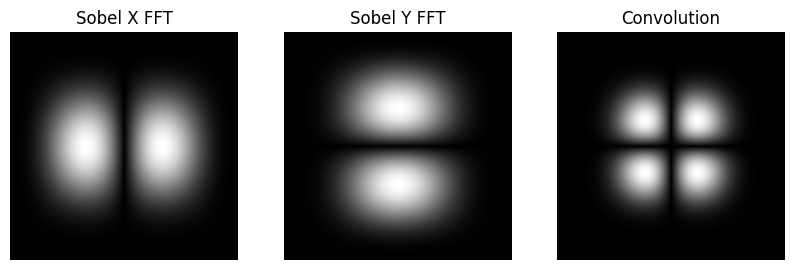

In [3]:
plt.figure(figsize=(10, 10))
plt.subplot(2, 3, 1)
plt.imshow(np.abs(sobel_x_fft), cmap='gray')
plt.title('Sobel X FFT')
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(np.abs(sobel_y_fft), cmap='gray')
plt.title('Sobel Y FFT')
plt.axis('off')

plt.subplot(2, 3, 3)
plt.imshow(np.abs(convoluted), cmap='gray')
plt.title('Convolution')
plt.axis('off')

(-0.5, 8.5, 8.5, -0.5)

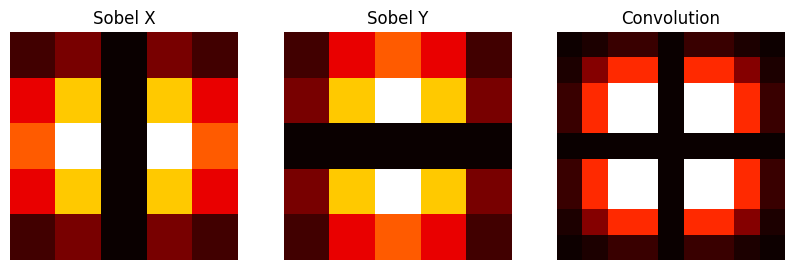

In [4]:

convoluted = sobel_x_fft * sobel_y_fft
convoluted_inverse = np.fft.ifft2(np.fft.ifftshift(convoluted))

plt.figure(figsize=(10, 10))
plt.subplot(2, 3, 1)
plt.imshow(abs(sobel_x), cmap='hot')
plt.title('Sobel X')
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(abs(sobel_y), cmap='hot')
plt.title('Sobel Y')
plt.axis('off')

plt.subplot(2, 3, 3)
plt.imshow(np.abs(convoluted_inverse[0:9, 0:9]), cmap='hot')
plt.title('Convolution')
plt.axis('off')

In [5]:

image = cv.imread('Data/micronxpoints.jpg', cv.IMREAD_GRAYSCALE)
image = cv.resize(image, image_size)

image_fft = np.fft.fftshift(np.fft.fft2(image))

transformed_image = image_fft * convoluted

original_image = np.fft.ifft2(np.fft.ifftshift(transformed_image))
original_image = np.abs(original_image)
original_image = (original_image / np.max(original_image) * 255).astype(np.uint8)

(-0.5, 399.5, 399.5, -0.5)

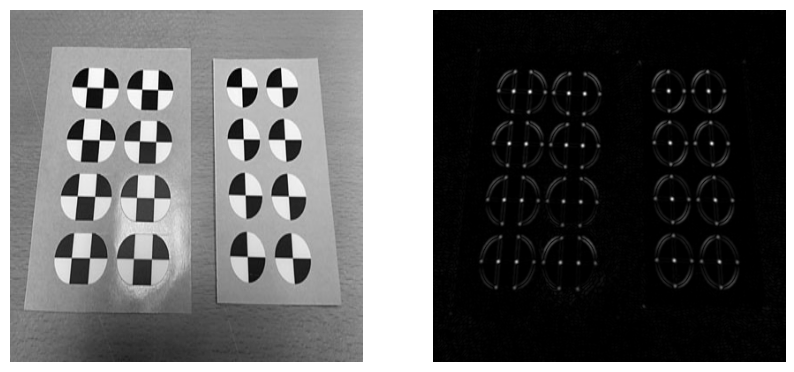

In [6]:
plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(original_image, cmap='gray')
plt.axis('off')

(-0.5, 399.5, 399.5, -0.5)

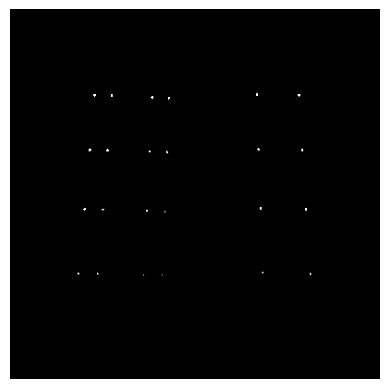

In [7]:
threshold = 100
mask = np.argwhere(original_image > threshold)
values = original_image[mask[:, 0], mask[:, 1]]

ret, threshold = cv.threshold(values, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)

ret, thresholded_image = cv.threshold(original_image, ret, 255, cv.THRESH_BINARY)

plt.imshow(thresholded_image, cmap='gray')
plt.axis('off')

In [9]:
ret, labels, stats, centroids = cv.connectedComponentsWithStats(thresholded_image)

criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 300, 0.001)
corners = cv.cornerSubPix(image, np.float32(centroids[1:]), (5, 5), (-1, -1), criteria)

(-0.5, 399.5, 399.5, -0.5)

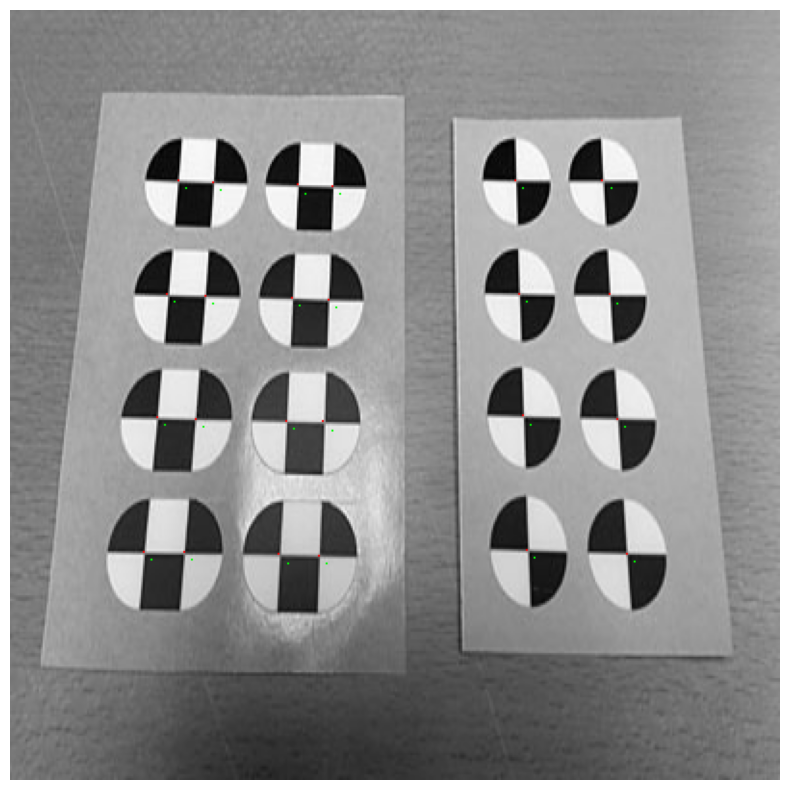

In [13]:
display_image = cv.cvtColor(image, cv.COLOR_GRAY2RGB)

for i, original, corner in zip(range(len(corners)), centroids[1:], corners):
    cv.circle(display_image, np.int32(original), 0, (0, 255, 0), 0)
    cv.circle(display_image, np.int32(corner), 0, (255, 0, 0), 0)

plt.figure(figsize=(10,10))
plt.imshow(display_image)
plt.axis('off')